import csv file

In [5]:
import pandas as pd
df= pd.read_csv("hotel_booking.csv")

data cleaning


Handling missing values

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df['country'] = df['country'].fillna('Unknown')


In [8]:
df['agent'] = df['agent'].fillna(0).astype(int)

In [9]:
df['company'] = df['company'].fillna(0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

object --> categorical

In [11]:
cat_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

for col in cat_cols:
    df[col] = df[col].astype('category')

object → datetime64

In [12]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

float--> int

In [13]:
df['children'] = df['children'].fillna(0).astype('int64')

In [14]:
df["agent"] = df["agent"].astype('int64')

In [15]:
df["company"] = df["company"].astype('int64')

int--> bool


In [16]:
df["is_canceled"] = df["is_canceled"].astype('bool')

In [17]:
df["is_repeated_guest"] = df["is_repeated_guest"].astype('bool')

In [18]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,NaN


Outlier detection

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

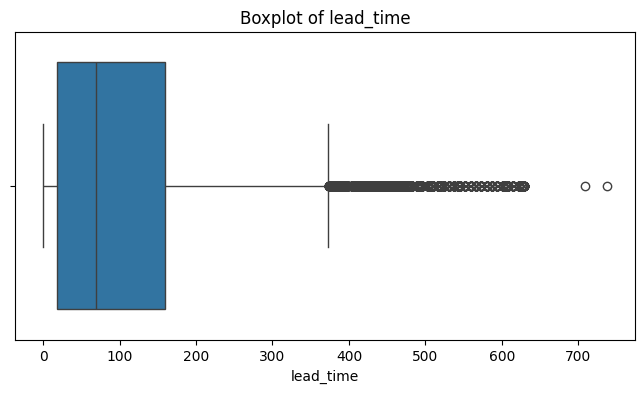

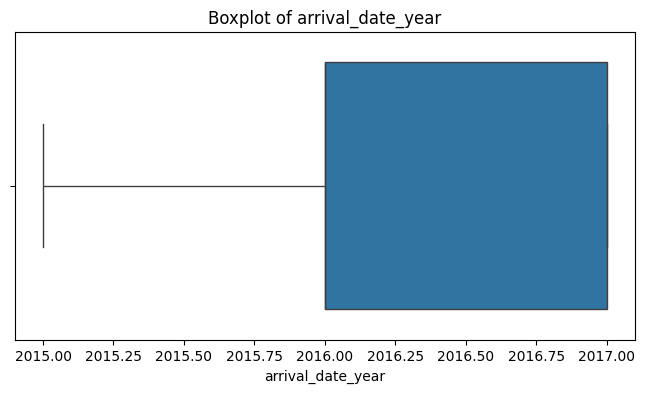

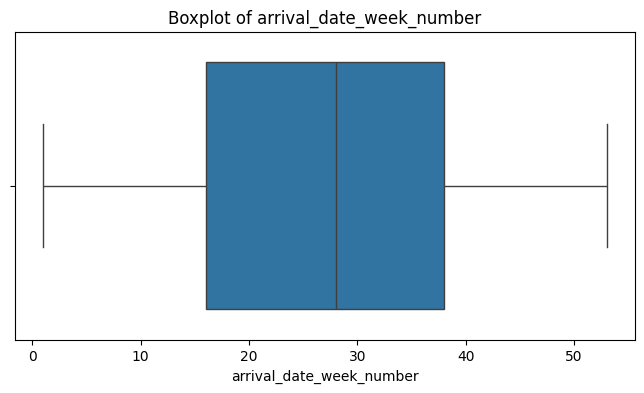

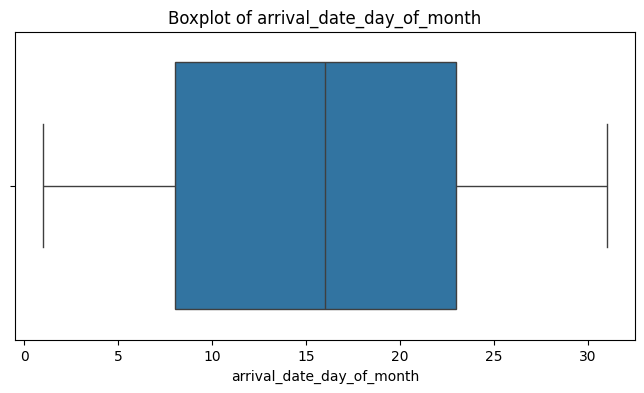

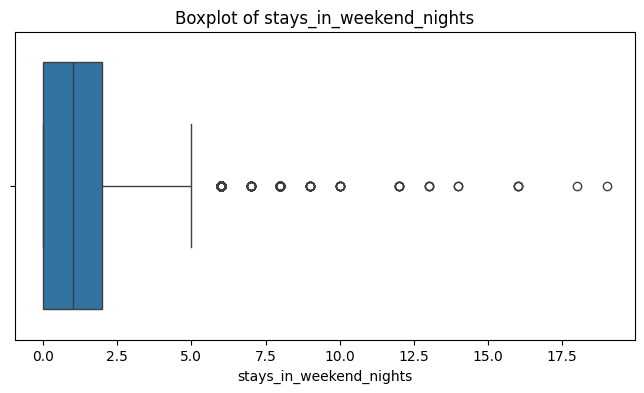

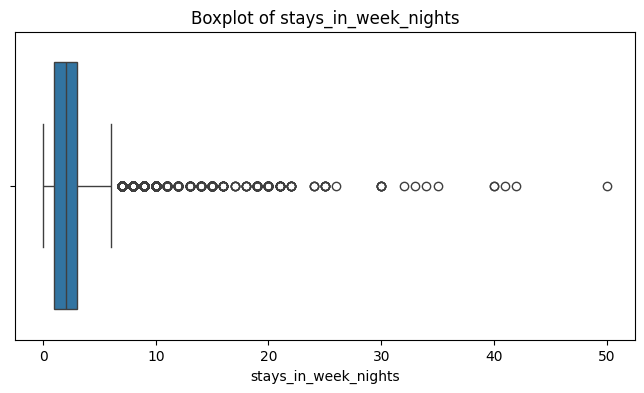

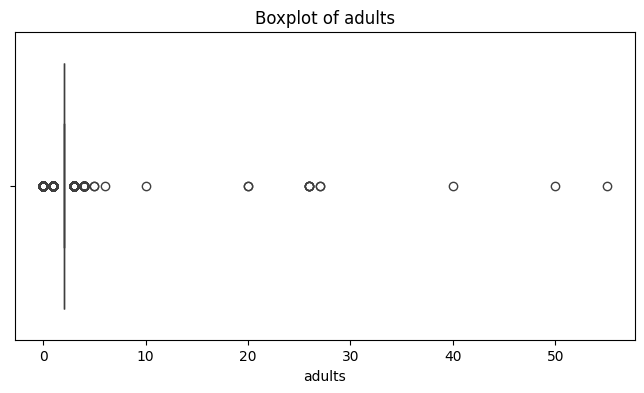

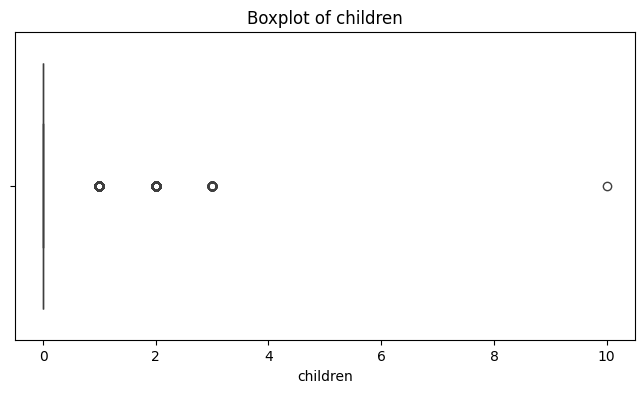

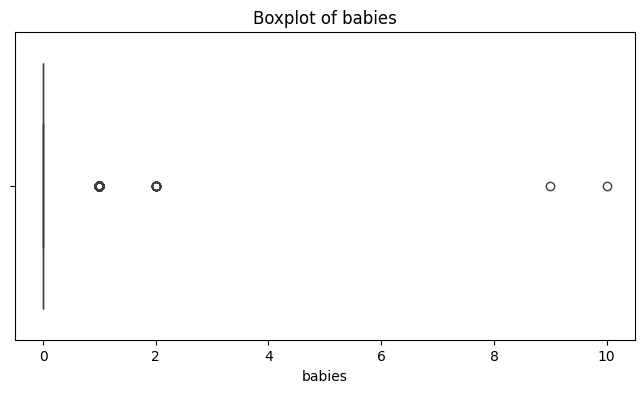

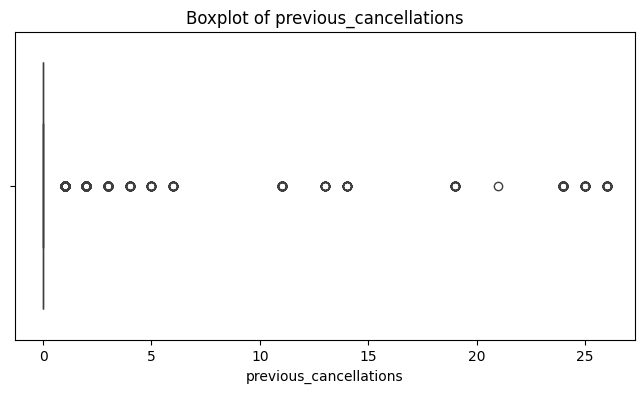

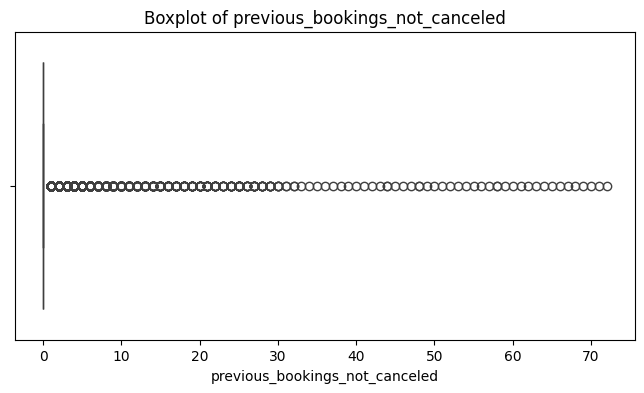

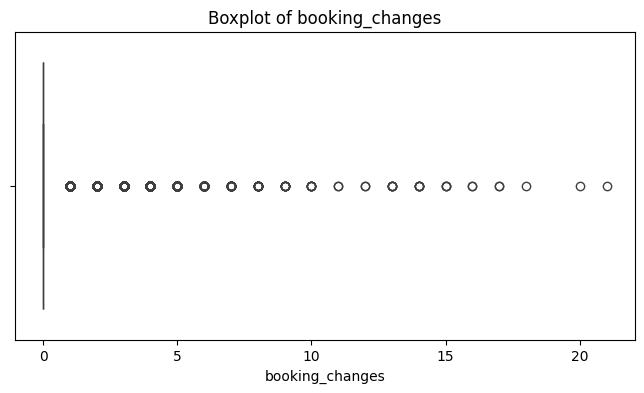

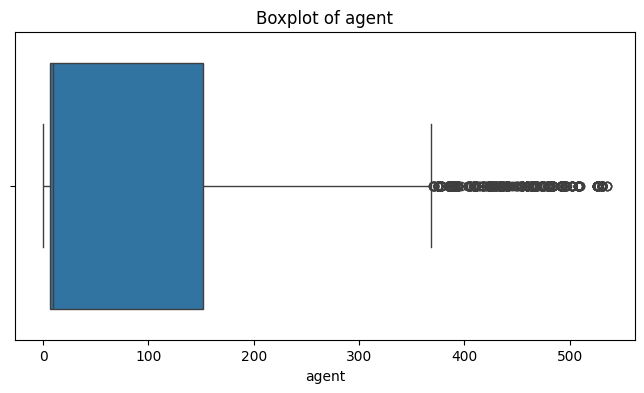

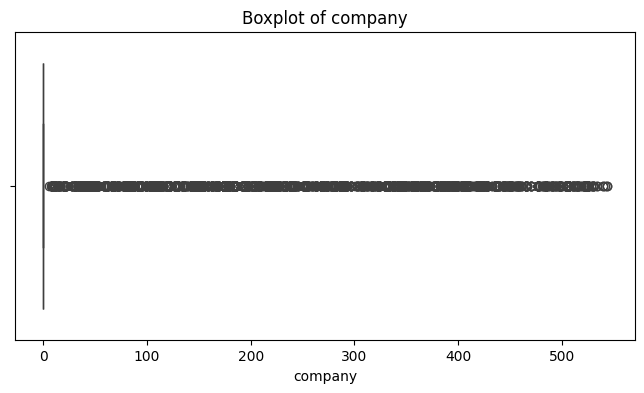

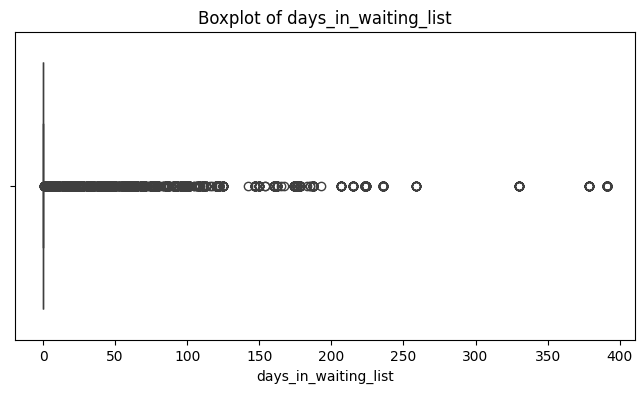

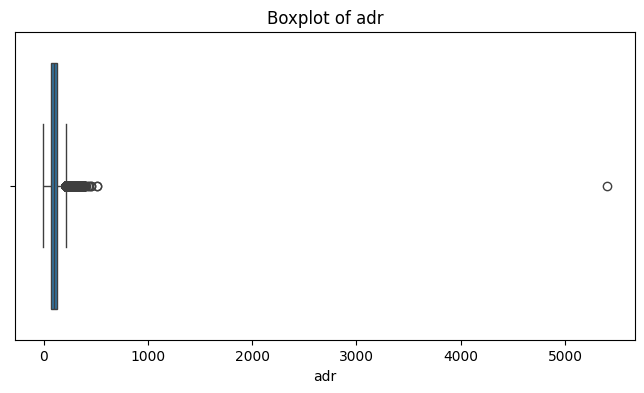

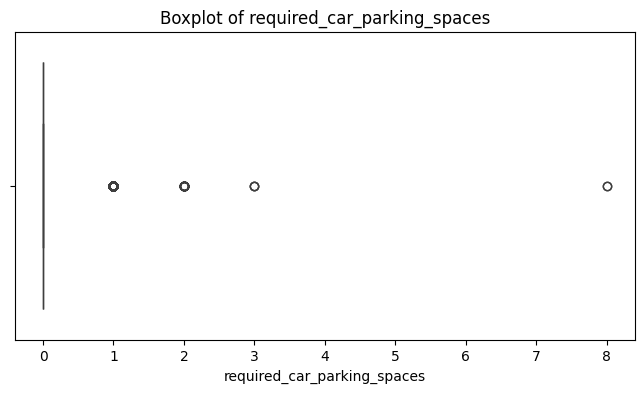

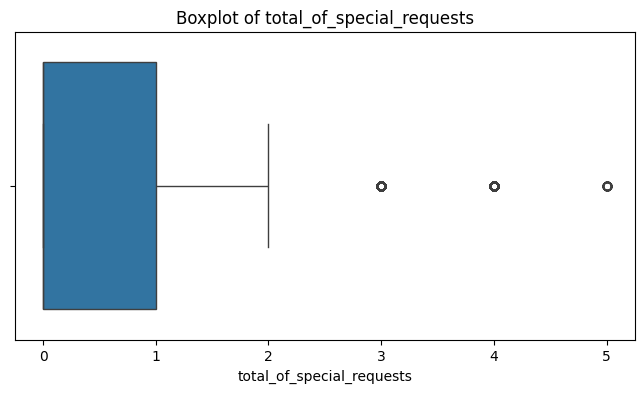

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


almost all numerical columns have outliers.

outlier report

In [21]:
cols_with_outliers = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'previous_cancellations', 
    'previous_bookings_not_canceled', 'booking_changes', 'agent', 
    'company', 'days_in_waiting_list', 'adr', 
    'required_car_parking_spaces', 'total_of_special_requests'
]
outlier_summary = {}

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary[col] = {
        "Total Rows": df[col].shape[0],
        "Outlier Count": outliers.shape[0],
        "Outlier %": round(outliers.shape[0] / df[col].shape[0] * 100, 2),
        "Min Value": df[col].min(),
        "Max Value": df[col].max(),
        "Lower Bound": round(lower,2),
        "Upper Bound": round(upper,2)
    }

outlier_report = pd.DataFrame(outlier_summary).T
print(outlier_report)


                                Total Rows  Outlier Count  Outlier %  \
lead_time                         119390.0         3005.0       2.52   
stays_in_weekend_nights           119390.0          265.0       0.22   
stays_in_week_nights              119390.0         3354.0       2.81   
adults                            119390.0        29710.0      24.88   
children                          119390.0         8590.0       7.19   
babies                            119390.0          917.0       0.77   
previous_cancellations            119390.0         6484.0       5.43   
previous_bookings_not_canceled    119390.0         3620.0       3.03   
booking_changes                   119390.0        18076.0      15.14   
agent                             119390.0         1254.0       1.05   
company                           119390.0         6797.0       5.69   
days_in_waiting_list              119390.0         3698.0       3.10   
adr                               119390.0         3793.0       

lead time--> max=737 days- no one books the hotel in 2yrs advance-->(Capping) max 1yr


In [23]:
import numpy as np
df["lead_time"] = np.where(df["lead_time"] > 365, 365, df["lead_time"])


stays_in_weekend_nights / stays_in_week_nights--> Max 2 weeks

In [26]:
df["stays_in_weekend_nights"] = np.where(df["stays_in_weekend_nights"] > 14, 14, df["stays_in_weekend_nights"])
df["stays_in_week_nights"] = np.where(df["stays_in_week_nights"] > 14, 14, df["stays_in_week_nights"])

adult can't be more than 4 in a single room. (not allowed)

In [27]:
df["adults"] = np.where(df["adults"] > 4, 4, df["adults"])

children & babies can't be more than 3 & 2 respectively.

In [29]:
df["children"] = np.where(df["children"] > 3, 3, df["children"])
df["babies"] = np.where(df["babies"] > 2, 2, df["babies"])

we can keep previous_cancellations, previous_bookings_not_canceled & booking_changes as it is because it shows customer behaviour

no need to handle agent & company as it is Ids.

days_in_waiting_list can be max 3 months.

In [30]:
df["days_in_waiting_list"] = np.where(df["days_in_waiting_list"] > 90, 90, df["days_in_waiting_list"])

adr(Average Daily Rate) --> max = 500

In [31]:
df["adr"] = np.where(df["adr"] > 500, 500, df["adr"])

normally, tourist can require max 2 parking space.

In [32]:
df["required_car_parking_spaces"] = np.where(df["required_car_parking_spaces"] > 2, 2, df["required_car_parking_spaces"])

special request can be 5. keep it.

Duplicates check

In [33]:
df.duplicated().sum()

np.int64(0)